## 정상인지 Spam 인지 확인해 보자

In [1]:
file_path = 'enron1/ham/0007.1999-12-14.farmer.ham.txt'

In [2]:
with open(file_path, 'r') as infile:
    ham_sample = infile.read()

In [3]:
print(ham_sample)

Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks


In [4]:
file_path = 'enron1/spam/0058.2003-12-21.GP.spam.txt'

In [5]:
with open(file_path, 'r') as infile:
    spam_sample = infile.read()

In [6]:
print(spam_sample)

Subject: stacey automated system generating 8 k per week parallelogram
people are
getting rich using this system ! now it ' s your
turn !
we ' ve
cracked the code and will show you . . . .
this is the
only system that does everything for you , so you can make
money
. . . . . . . .
because your
success is . . . completely automated !
let me show
you how !
click
here
to opt out click here % random _ text



## 이메일을 모두 읽어들여서 레이블 변수와 메일 변수에 담는다. (spam = 1, 정상 = 0)

In [7]:
import glob
import os

In [8]:
emails, labels = [], []

In [9]:
# then to load the spam e-mail files

In [10]:
file_path = 'enron1/spam'

In [11]:
filenames = glob.glob(os.path.join(file_path, '*.txt'))

In [12]:
filenames.sort()

In [13]:
for filename in filenames:
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
    labels.append(1)

In [14]:
file_path = 'enron1/ham'

In [15]:
filenames = glob.glob(os.path.join(file_path, '*.txt'))

In [16]:
filenames.sort()

In [16]:
for filename in filenames:
    with open(filename, 'r', encoding='ISO-8859-1') as infile:
        emails.append(infile.read())
    labels.append(0)

In [17]:
len(emails)

5172

In [18]:
len(labels)

5172

## 원본 테스트 데이터를 전처리하고 정제
- 숫자와 구두점 표기 제거
- 사람 이름 제거(옵션)
- 불용어 (stopword) 제거
- 표제어 원형 복원

In [19]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\PeterKim\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PeterKim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [21]:
def letters_only(astr):
    return astr.isalpha()

In [22]:
all_names = set(names.words())

In [23]:
#all_names

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
# 텍스트 정제를 수행하는 함수
def clean_text(docs):
    cleaned_docs = []
    for doc in docs:
        cleaned_docs.append(
            ' '.join([lemmatizer.lemmatize(word.lower())
                    for word in doc.split()
                        if letters_only(word)
                        and word not in all_names]))
    return cleaned_docs

In [26]:
cleaned_emails = clean_text(emails)

In [27]:
cleaned_emails[0]

'dobmeos with hgh my energy level ha gone up stukm introducing doctor formulated hgh human growth hormone also called hgh is referred to in medical science a the master hormone it is very plentiful when we are young but near the age of twenty one our body begin to produce le of it by the time we are forty nearly everyone is deficient in hgh and at eighty our production ha normally diminished at least advantage of hgh increased muscle strength loss in body fat increased bone density lower blood pressure quickens wound healing reduces cellulite improved vision wrinkle disappearance increased skin thickness texture increased energy level improved sleep and emotional stability improved memory and mental alertness increased sexual potency resistance to common illness strengthened heart muscle controlled cholesterol controlled mood swing new hair growth and color restore read more at this website unsubscribe'

## 불용어 제거
- 정제된 텍스틑 데이터에서 단어 출현 빈도 피처 추출

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(stop_words = 'english', max_features=500)  # 출현 빈도가 높은 상위 500개만 고려

In [30]:
# 벡터화는 문서의 행렬을 텀도큐먼트 행렬(term-document matrix) 형태로 변환한다.
term_docs = cv.fit_transform(cleaned_emails)

In [31]:
print(term_docs[0])

  (0, 481)	1
  (0, 357)	1
  (0, 69)	1
  (0, 285)	1
  (0, 424)	1
  (0, 250)	1
  (0, 345)	1
  (0, 445)	1
  (0, 231)	1
  (0, 497)	1
  (0, 47)	1
  (0, 178)	2
  (0, 125)	2


In [32]:
feature_names = cv.get_feature_names()

In [33]:
feature_names[481]

'website'

In [34]:
feature_names[357]

'read'

In [35]:
feature_names[125]

'energy'

In [36]:
feature_mapping = cv.vocabulary

## 사전 확률 (Prior) 계산

In [37]:
def get_label_index(labels):
    from collections import defaultdict
    label_index = defaultdict(list)
    for index, label in enumerate(labels):
        label_index[label].append(index)
    return label_index

In [38]:
label_index = get_label_index(labels)

In [39]:
label_index

defaultdict(list,
            {0: [1500,
              1501,
              1502,
              1503,
              1504,
              1505,
              1506,
              1507,
              1508,
              1509,
              1510,
              1511,
              1512,
              1513,
              1514,
              1515,
              1516,
              1517,
              1518,
              1519,
              1520,
              1521,
              1522,
              1523,
              1524,
              1525,
              1526,
              1527,
              1528,
              1529,
              1530,
              1531,
              1532,
              1533,
              1534,
              1535,
              1536,
              1537,
              1538,
              1539,
              1540,
              1541,
              1542,
              1543,
              1544,
              1545,
              1546,
              1547,
              1548,

In [40]:
label_index[1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [41]:
def get_prior(label_index):
    '''학습 샘플을 가지고 사전 확률을 계산한다.
    Args:
        label_index(grouped sample indices by class)
    Returns:
        dictionary, with class label as key, corresponding
        prior as the value
    '''
    prior = {label:len(index) for label, index in label_index.items()}  # 책 오타 iteritems() -> items()
    total_count = sum(prior.values())
    
    for label in prior:
        prior[label] /= float(total_count)
    return prior
        

In [42]:
prior = get_prior(label_index)

In [43]:
prior

{0: 0.7099767981438515, 1: 0.2900232018561485}

## 유사가능도(likelihood) 구하기

In [44]:
import numpy as np

In [45]:
def get_likelihood(term_document_matrix, label_index, smoothing=0):
    ''' 학습 샘플을 가지고 유사 가능도를 계산한다.
    Args:
        term_docuement_matrix (sparse matrix)
        label_indx (grouped sample indices by class)
        smoothing (integer, additive Laplace smoothing
    Returns:
        키는 클래스 레이블, 밸류는 조건부 확률 P(feature | vector) 의
        조합으로 이뤄진 딕셔너리(dictionary) 의 벡터
    '''
    likelihood = {}
    for label, index in label_index.items():
        likelihood[label] = term_document_matrix[index, :].sum(axis = 0) + smoothing
        likelihood[label] = np.asarray(likelihood[label])[0]
        total_count = likelihood[label].sum()
        likelihood[label] = likelihood[label] / float(total_count)
    return likelihood

## 값을 계산해 내자

In [46]:
smoothing = 1

In [47]:
likelihood = get_likelihood(term_docs, label_index, smoothing)

In [48]:
len(likelihood[0]) #likelihood[0] 는 정상 메일 클래스의 길이 500짜리 벡터의 조건부 확률 P(feature | legitimate) 를 의미한다.

500

In [49]:
likelihood[0][:5] # 정상 메일의 첫 5개의 피처의 확률

array([0.00108581, 0.00095774, 0.00087978, 0.00084637, 0.00010023])

In [50]:
likelihood[1][:5] # 스팸 메일의 첫 5개의 피처의 확률

array([0.00108997, 0.00141902, 0.00456555, 0.0005347 , 0.00421594])

In [51]:
feature_names[:5]

['able', 'access', 'account', 'accounting', 'act']

## 이제 테스팅/신규 샘플 데이터의 사후 확률을 계산해 보자

In [52]:
def get_posterior(term_document_matrix, label_index, likelihood):
    ''' 사전 확률과 유사 가능도를 바탕으로 테스트 샘플 데이터의 사후 확률을 계산한다.
    Args:
        term_document_matrix (sparse matrix)
        label_index (딕셔너리의 데이터 구조를 띤다. 키 값으로 클래스 레이블을, 
                       밸류 값으로는 관련 사전 확률이 할당된다.)
        likelihood (딕셔너리 형태를 띤다. 키 값은 클래스 레이블을 의미하며,
                      밸류 값으로는 해당 클래스에 대한 조건부 확률 벡터를 갖는다.)
    Returns:
        딕셔너리 데이터 타입 (키 값은 클래스 레이블, 밸류는 관련 사후 확률값으로 구성됨)        
    '''
    num_docs = term_document_matrix.shape[0]
    posteriors = []
    
    for i in range(num_docs):
        # 사후 확률은 사전 확률 * 유사 가능도에 비례한다.
        # = exp(log (사전확률 * 유사 가능도))
        # = exp(log(사전확률) + log(유사 가능도))
        posterior = {key: np.log(prior_label) for key, prior_label in prior.items()}
        
        for label, likelihood_label in likelihood.items():
            term_document_vector = term_document_matrix.getrow(i)
            counts = term_document_vector.data
            indices = term_document_vector.indices
            for count, index in zip(counts, indices):
                posterior[label] += np.log(likelihood_label[index]) * count
                
        # exp(-1000) : exp(-999) 는 분모가 0이 되는 문제를 유발한다.
        # 하지만 이것은 exp(0):exp(1) 과 동치다.
        min_log_posterior = min(posterior.values())
        
        for label in posterior:
            try:
                posterior[label] = np.exp(posterior[label] - min_log_posterior)
            except:
                # 어떤 값의 로그 치환값이 지나치게 클 경우,
                # 이 값에는 무한대를 의미하는 'inf' 를 할당한다.
                posterior[label] = float('inf')
                print('inf')
                
        #전체 합이 1이 되도록 정규화한다.
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1.0
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    return posteriors

In [53]:
emails_test = [
    '''Subject: flat screens
    hello ,
    please call or contact regarding the other flat screens requested .
    trisha tlapek - eb 3132 b
    michael sergeev - eb 3132 a
    also the sun blocker that was taken away from eb 3131 a .
    trisha should two monitors also michael .
    thanks
    kevin moore''',
    '''Subject: having problems in bed ? we can help !
    cialis allows men to enjoy a fully normal sex life without having to plan the sexual act .
    if we let things terrify us , life will not be worth living .
    brevity is the soul of lingerie .
    suspicion always haunts the guilty mind .''',
]

In [54]:
emails_test

['Subject: flat screens\n    hello ,\n    please call or contact regarding the other flat screens requested .\n    trisha tlapek - eb 3132 b\n    michael sergeev - eb 3132 a\n    also the sun blocker that was taken away from eb 3131 a .\n    trisha should two monitors also michael .\n    thanks\n    kevin moore',
 'Subject: having problems in bed ? we can help !\n    cialis allows men to enjoy a fully normal sex life without having to plan the sexual act .\n    if we let things terrify us , life will not be worth living .\n    brevity is the soul of lingerie .\n    suspicion always haunts the guilty mind .']

In [55]:
cleaned_test = clean_text(emails_test)

In [56]:
term_docs_test = cv.transform(cleaned_test)

In [57]:
prior

{0: 0.7099767981438515, 1: 0.2900232018561485}

In [58]:
posterior = get_posterior(term_docs_test, prior, likelihood)

In [59]:
print(posterior)

[{1: 0.0032745671008376, 0: 0.9967254328991624}, {1: 0.9999984725538845, 0: 1.5274461154428757e-06}]


## Training Set / Test Set 을 sklearn 으로 나눠서 해 보자

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=42)

In [62]:
len(X_train), len(Y_train)

(3465, 3465)

In [63]:
len(X_test), len(Y_test)

(1707, 1707)

In [64]:
term_docs_train = cv.fit_transform(X_train)

In [65]:
label_index = get_label_index(Y_train)

In [66]:
prior = get_prior(label_index)

In [67]:
likelihood = get_likelihood(term_docs_train, label_index, smoothing)

In [68]:
term_docs_test = cv.fit_transform(X_test)

In [69]:
posterior = get_posterior(term_docs_test, prior, likelihood)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


In [70]:
posterior

[{0: 0.9965902742607629, 1: 0.00340972573923714},
 {0: 0.9999999999991872, 1: 8.128100215232597e-13},
 {0: 0.9208472686095903, 1: 0.07915273139040968},
 {0: 0.9997046558489393, 1: 0.0002953441510607252},
 {0: 0.7126670902780996, 1: 0.28733290972190034},
 {0: 0.17676452594202702, 1: 0.8232354740579729},
 {0: 0.0, 1: 1.0},
 {0: 1.0, 1: 2.506629116071914e-25},
 {0: 0.9999999756886662, 1: 2.431133387590338e-08},
 {0: 0.4936625923050888, 1: 0.5063374076949111},
 {0: 2.1089108189632835e-22, 1: 1.0},
 {0: 1.0, 1: 3.1268765196355635e-39},
 {0: 1.0, 1: 3.991645610807839e-40},
 {0: 1.0, 1: 2.727079024055065e-23},
 {0: 0.9990744309031374, 1: 0.0009255690968625859},
 {0: 1.0, 1: 6.038821242584e-20},
 {0: 0.901179684510954, 1: 0.09882031548904598},
 {0: 0.9927054116792682, 1: 0.007294588320731812},
 {0: 0.9999988838478835, 1: 1.1161521164810198e-06},
 {0: 0.9984555535036487, 1: 0.0015444464963513685},
 {0: 0.13292178488469125, 1: 0.8670782151153087},
 {0: 0.0004586407894422964, 1: 0.999541359210557

In [71]:
correct = 0.0

In [72]:
for pred, actual in zip(posterior, Y_test):
    if actual == 1:
        if pred[1] >= 0.5:
            correct += 1
    elif pred[0] > 0.5:
        correct += 1
    

In [73]:
print('The accuracy on {0} testing samples is: {1:.1f}%'.format(len(Y_test), correct/len(Y_test)*100))

The accuracy on 1707 testing samples is: 75.1%


## Scikit-learn API 로 바로 확인해 보자

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
clf = MultinomialNB(alpha = 1.0, fit_prior = True)

In [76]:
clf.fit(term_docs_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
prediction_prob = clf.predict_proba(term_docs_test)

In [78]:
prediction_prob[0:10]

array([[9.96590274e-01, 3.40972574e-03],
       [1.00000000e+00, 8.12810022e-13],
       [9.20847269e-01, 7.91527314e-02],
       [9.99704656e-01, 2.95344151e-04],
       [7.12667090e-01, 2.87332910e-01],
       [1.76764526e-01, 8.23235474e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.50662912e-25],
       [9.99999976e-01, 2.43113339e-08],
       [4.93662592e-01, 5.06337408e-01]])

In [86]:
prediction_prob.size

3414

In [88]:
prediction = clf.predict(term_docs_test)

In [89]:
prediction[0:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [90]:
accuracy = clf.score(term_docs_test, Y_test)

In [91]:
print('The accuracy using MultinomialNB is : {0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB is : 75.1%


 ## 분류기의 성능평가

In [92]:
from sklearn.metrics import confusion_matrix

In [94]:
confusion_matrix(Y_test, prediction, labels = [0,1])

array([[967, 224],
       [201, 315]], dtype=int64)

In [95]:
## precision, recall, f1
from sklearn.metrics import precision_score, recall_score, f1_score

In [97]:
precision_score(Y_test, prediction, pos_label = 1)

0.5844155844155844

In [98]:
recall_score(Y_test, prediction, pos_label = 1)

0.6104651162790697

In [99]:
f1_score(Y_test, prediction, pos_label =1)

0.5971563981042654

In [100]:
f1_score(Y_test, prediction, pos_label = 0) #정상 메일 클래스 = 0

0.8198389147944045

In [101]:
## classification_report 함수의 사용
from sklearn.metrics import classification_report

In [102]:
report = classification_report(Y_test, prediction)

In [103]:
print(report)

             precision    recall  f1-score   support

          0       0.83      0.81      0.82      1191
          1       0.58      0.61      0.60       516

avg / total       0.75      0.75      0.75      1707



## ROC Curve
- ROC : Receiver Operating Characteristic
- AUC : Area Under Curve

In [104]:
pos_prob = prediction_prob[:, 1]

In [106]:
thresholds = np.arange(0.0, 1.1, 0.1)

In [108]:
true_pos = [0]*len(thresholds)

In [109]:
false_pos = [0]*len(thresholds)

In [111]:
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            #실제값과 예측값 모두 1인 경우
            if y == 1:
                true_pos[i] += 1
            #실제값은 0인 반면, 예측값은 1인 경우
            else:
                false_pos[i] += 1
        else:
            break

In [122]:
true_pos_rate = [tp / 516 for tp in true_pos]
true_pos_rate

[1.0,
 0.7403100775193798,
 0.7112403100775194,
 0.6608527131782945,
 0.6453488372093024,
 0.6104651162790697,
 0.5891472868217055,
 0.5755813953488372,
 0.5581395348837209,
 0.5271317829457365,
 0.12790697674418605]

In [123]:
false_pos_rate = [fp / 1191 for fp in false_pos]
false_pos_rate

[1.0,
 0.2409739714525609,
 0.22418136020151133,
 0.2141057934508816,
 0.20570948782535683,
 0.18807724601175482,
 0.18219983207388749,
 0.17212426532325778,
 0.16120906801007556,
 0.14105793450881612,
 0.0218303946263644]

In [116]:
import matplotlib.pyplot as plt

In [117]:
%matplotlib inline

No handles with labels found to put in legend.


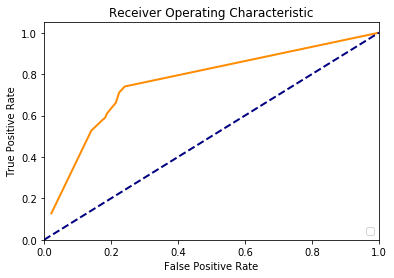

In [121]:
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color= 'darkorange', lw=lw)
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [124]:
## SciKit-learn 함수이용
from sklearn.metrics import roc_auc_score

In [125]:
roc_auc_score(Y_test, pos_prob)

0.8369318662579162

## 모델 튜닝과 교차검증

In [148]:
len(cleaned_emails), len(labels)

(5172, 5172)

In [134]:
from sklearn.model_selection import StratifiedKFold
k = 10
k_fold = StratifiedKFold(n_splits=k)
cleaned_emails_np = np.array(cleaned_emails)
labels_np = np.array(labels)

In [177]:
max_features_option = [2000, 4000, 8000]
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0]
fit_prior_option = [True, False]
auc_record = {}

In [178]:
for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
    X_train = cleaned_emails_np[train_indices]
    X_test = cleaned_emails_np[test_indices]
    Y_train = labels_np[train_indices]
    Y_test = labels_np[test_indices]
    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words='english', max_features=max_features)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for smoothing_factor in smoothing_factor_option:
            if smoothing_factor not in auc_record[max_features]:
                auc_record[max_features][smoothing_factor] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=smoothing_factor, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:, 1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][smoothing_factor][fit_prior] = auc + auc_record[max_features][smoothing_factor].get(fit_prior, 0.0)

In [174]:
print('max features smoothing fit prior auc'.format(max_features, smoothing, fit_prior, auc/k))

max features smoothing fit prior auc


In [180]:
for max_features, max_features_record in auc_record.items():
    for smoothing, smoothing_record in max_features_record.items():
        for fit_prior, auc in smoothing_record.items():
            print('    {0}    {1}    {2}    {3:.4f}'.format(max_features, smoothing, fit_prior, auc/k))

    2000    0.5    True    0.9744
    2000    0.5    False    0.9744
    2000    1.0    True    0.9726
    2000    1.0    False    0.9725
    2000    1.5    True    0.9715
    2000    1.5    False    0.9715
    2000    2.0    True    0.9706
    2000    2.0    False    0.9707
    4000    0.5    True    0.9817
    4000    0.5    False    0.9815
    4000    1.0    True    0.9797
    4000    1.0    False    0.9797
    4000    1.5    True    0.9785
    4000    1.5    False    0.9787
    4000    2.0    True    0.9778
    4000    2.0    False    0.9779
    8000    0.5    True    0.9856
    8000    0.5    False    0.9855
    8000    1.0    True    0.9845
    8000    1.0    False    0.9845
    8000    1.5    True    0.9841
    8000    1.5    False    0.9841
    8000    2.0    True    0.9837
    8000    2.0    False    0.9838


In [179]:
print(auc_record)

{2000: {0.5: {True: 9.744341507720254, False: 9.743687186549776}, 1.0: {True: 9.726073579354736, False: 9.725047017533468}, 1.5: {True: 9.7146733206966, False: 9.715017869130829}, 2.0: {True: 9.706112180626308, False: 9.706747324566601}}, 4000: {0.5: {True: 9.81694519310508, False: 9.814603892706236}, 1.0: {True: 9.796673651423607, False: 9.797172678987483}, 1.5: {True: 9.785206778422777, False: 9.786758875330728}, 2.0: {True: 9.778234090550091, False: 9.77867877028788}}, 8000: {0.5: {True: 9.85627517474233, False: 9.854758174386921}, 1.0: {True: 9.845380632231569, False: 9.845271097421316}, 1.5: {True: 9.840752033724282, False: 9.841142390317103}, 2.0: {True: 9.837345101291318, False: 9.837871672985033}}}
